Chapter 31  
# 满足二元高斯分布的随机数  
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as multi_norm
import numpy as np
from matplotlib.patches import Rectangle
from scipy.stats import multivariate_normal

## 生成数据

In [1]:
np.random.seed(2)
mu_X = 0
mu_Y = 0
MU = [mu_X, mu_Y]
sigma_X = 1
sigma_Y = 1
num = 400
X_grid = np.linspace(-3,3,200)
Y_grid = np.linspace(-3,3,200)

XX, YY = np.meshgrid(X_grid, Y_grid)

XXYY = np.dstack((XX, YY))

## 可视化

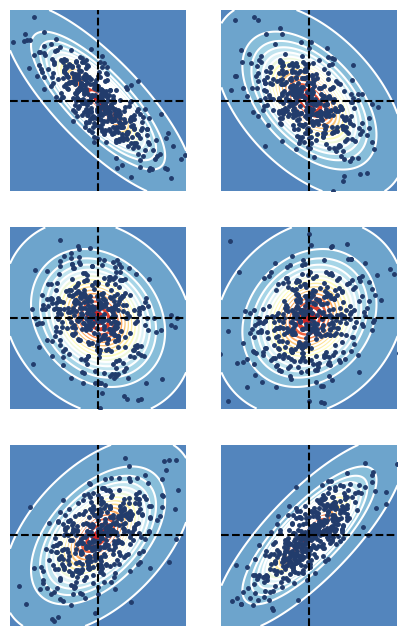

In [1]:
rho_array = [-0.8, -0.5, -0.2, 0.2, 0.5, 0.8]

fig = plt.figure(figsize = (6,9))

for idx in range(6):
    
    rho = rho_array[idx]
    # covariance
    SIGMA = [[sigma_X**2, sigma_X*sigma_Y*rho], 
             [sigma_X*sigma_Y*rho, sigma_Y**2]] 
    bi_norm = multivariate_normal(MU, SIGMA)
    pdf_fine = bi_norm.pdf(XXYY)
    X, Y = multi_norm(MU, SIGMA, num).T
    center_X = np.mean(X)
    center_Y = np.mean(Y)
    
    ax = plt.subplot(3,2,idx + 1)
    # plot center of data
    plt.plot(X,Y,'.', color = '#223C6C', 
             alpha = 1, markersize = 5)
    
    levels = np.linspace(-pdf_fine.max() * 0.2, pdf_fine.max() * 1.1, 20)
    ax.contourf(XX,YY,pdf_fine,levels = levels,
               cmap = 'RdYlBu_r')
    ax.contour(XX,YY,pdf_fine,levels = levels,
               colors = 'w')
    ax.axvline(x = 0, color = 'k', linestyle = '--')
    ax.axhline(y = 0, color = 'k', linestyle = '--')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim((-3,3))
    ax.set_ylim((-3,3))
    
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')